# DS4440 - Practical Neural Networks
## Week 5 : Exploratory Data Analysis 

___
**Instructor** : Prof. Steve Schmidt <br/>
**Teaching Assistants** : Vishwajeet Hogale (hogale.v@northeastern.edu) | Chaitanya Agarwal (agarwal.cha@northeastern.edu)

## Part 1 : Exploratory Data Analysis

EDA helps you get to know your data better by:

Looking at the Data: Understanding what the data looks like, checking for patterns, missing values, or strange data points.
1. Visualizing: Using graphs, charts, and plots to visualize data distribution and relationships between variables.
2. Statistical Summary: Calculating basic statistics like averages, medians, and standard deviations to get a sense of the data's spread.

It's like getting a "first impression" of your data to spot trends, relationships, and problems, so you can make informed decisions for the next steps in analysis or modeling.

In this notebook, we'll follow the **six** key sections below:

1. **One Hot Encoding**
2. **Label Encoding**
3. **Scaling**
    - **Normalization**
    - **Standardization**
4. **Class Imbalance**


Let's dive in and explore how neural networks can tackle this exciting problem!

## 0. Setup and Load libraries

The below cell helps you download all the necessary libraries or packages required to run this notebook without running into any errors.

In [1]:
! pip install -r requirements.txt

## 1. Data Gathering

### **About the Dataset**  

The **Superstore** dataset contains **sales transaction records** from a retail store, providing insights into **shipping, customer segments, locations, product categories, and financial metrics**. This dataset is widely used for **sales analysis, demand forecasting, and business intelligence applications**.  

The dataset includes the following **13 attributes**:  

1. **Ship Mode**: The method of shipping used for the order (e.g., Standard Class, First Class)  
2. **Segment**: Customer segment (e.g., Consumer, Corporate, Home Office)  
3. **Country**: The country where the order was placed  
4. **City**: The city where the order was shipped  
5. **State**: The state where the order was shipped  
6. **Postal Code**: The postal code of the delivery address  
7. **Region**: The geographical region (e.g., West, East, Central, South)  
8. **Category**: The broad category of the product (e.g., Furniture, Office Supplies, Technology)  
9. **Sub-Category**: The specific type of product within a category (e.g., Chairs, Phones, Binders)  
10. **Sales**: The revenue generated from the sale  
11. **Quantity**: The number of units sold  
12. **Discount**: The discount applied to the sale  
13. **Profit**: The profit earned from the sale after deducting costs  

### **Dataset Use Cases**  
This dataset is useful for various business analytics and machine learning tasks, including:  
- **Sales Forecasting**: Predicting future sales based on historical data  
- **Customer Segmentation**: Identifying different customer groups based on purchasing behavior  
- **Profitability Analysis**: Analyzing which products and regions generate the highest profits  
- **Discount Impact**: Evaluating how discounts affect overall sales and profitability  

### **Dataset Source**  
The **Superstore** provides a great opportunity to explore **data preprocessing, exploratory data analysis (EDA), and predictive modeling** in retail analytics.


In [2]:
import pandas as pd
import numpy as np
from torchvision import datasets, transforms

# Load the dataset 
df = pd.read_csv("./data/Superstore.csv")

In [3]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Check the size of the training dataset

In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 9994 rows and 13 columns


### Explore the NaNs

In [6]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Check the column datatypes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Get statistical information on numerical columns

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Get statistical information on categorical columns

In [9]:
categorical_columns_df = df.select_dtypes("object")
categorical_columns_df.value_counts()

Ship Mode       Segment      Country        City           State       Region   Category         Sub-Category
Standard Class  Consumer     United States  New York City  New York    East     Office Supplies  Binders         61
                                                                                                 Paper           41
                                            Los Angeles    California  West     Office Supplies  Paper           40
                                            Houston        Texas       Central  Office Supplies  Binders         31
                                            Los Angeles    California  West     Furniture        Furnishings     31
                                                                                                                 ..
Second Class    Corporate    United States  Denver         Colorado    West     Furniture        Furnishings      1
                                            Delray Beach   Florida     South  

In [10]:
categorical_columns_df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


## 2. One Hot Encoding


### 2.1 **What is One-Hot Encoding?**  
One-hot encoding is a technique used to convert **categorical variables** into a numerical format by creating **binary (0 or 1) columns** for each unique category.  

For example, **Ship Mode** would be transformed as follows:  

| Ship Mode       | Standard Class | First Class | Second Class | Same Day |  
|---------------|---------------|------------|-------------|----------|  
| Standard Class | 1             | 0          | 0           | 0        |  
| First Class   | 0             | 1          | 0           | 0        |  
| Second Class  | 0             | 0          | 1           | 0        |  
| Same Day      | 0             | 0          | 0           | 1        |  


In [11]:
# Selecting categorical columns for One-Hot Encoding
categorical_columns = categorical_columns_df.columns

# Apply One-Hot Encoding using pandas get_dummies()
df_ohe = pd.get_dummies(df, columns=categorical_columns)


In [12]:
df_ohe.head()

,Postal Code,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,42420,261.9600,2,0.00,41.9136,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,42420,731.9400,3,0.00,219.5820,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,90036,14.6200,2,0.00,6.8714,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,33311,957.5775,5,0.45,-383.0310,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
4,33311,22.3680,2,0.20,2.5164,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False


If the dataset is very large, **dummy encoding** (dropping one category to avoid multicollinearity) or **target encoding** may be better alternatives.

In [13]:
# Selecting categorical columns for One-Hot Encoding
categorical_columns = categorical_columns_df.columns

# Apply One-Hot Encoding using pandas get_dummies()
df_ohe = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [14]:
df_ohe.head()

,Postal Code,Sales,Quantity,Discount,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,42420,261.9600,2,0.00,41.9136,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,42420,731.9400,3,0.00,219.5820,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,90036,14.6200,2,0.00,6.8714,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,33311,957.5775,5,0.45,-383.0310,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,33311,22.3680,2,0.20,2.5164,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


### 2.2 **When to Use One-Hot Encoding?**  
- When dealing with **categorical features** that do not have an **ordinal relationship** (i.e., the categories do not have a meaningful order).  
- When using machine learning models that cannot interpret categorical values directly, such as **linear regression, decision trees, and neural networks**.  


### 2.3 **Why do we use One-Hot Encoding?**

Several categorical columns in the **Superstore dataset** require one-hot encoding to be used effectively in machine learning models. Some key features that may need encoding include:  

- **Ship Mode** (e.g., Standard Class, First Class, Second Class)  
- **Segment** (e.g., Consumer, Corporate, Home Office)  
- **Region** (e.g., West, East, Central, South)  
- **Category** (e.g., Furniture, Office Supplies, Technology)  
- **Sub-Category** (e.g., Chairs, Phones, Binders)


### **Considerations**  
- One-hot encoding **increases the number of columns**, which can lead to **high-dimensional data**.    
- Some machine learning models, such as **tree-based models (e.g., Random Forest, XGBoost), can handle categorical data directly** without needing one-hot encoding.  


## 3. Label Encoding

### 3.1 **What is Label Encoding?**  
Label encoding is a technique used to convert **categorical variables** into numerical values by assigning each unique category a **unique integer (0, 1, 2, ...)**. Instead of creating multiple binary columns like one-hot encoding, it replaces each category with a single numeric label.

For example, if we apply label encoding to **Ship Mode**, we get:  

| Ship Mode       | Encoded Value |  
|---------------|--------------|  
| Standard Class | 0            |  
| First Class   | 1            |  
| Second Class  | 2            |  
| Same Day      | 3            | 

Using Label Encoder 

In [15]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df_labenc = df.copy()


In [16]:
df_labenc.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Selecting categorical columns for Label Encoding
categorical_columns = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']

# Apply Label Encoding
for col in categorical_columns:
    df_labenc[col] = label_encoder.fit_transform(df_labenc[col])

# Display the first few rows of the transformed dataset
print(df_labenc.head())

   Ship Mode  Segment        Country             City       State  \
0          2        0  United States        Henderson    Kentucky   
1          2        0  United States        Henderson    Kentucky   
2          2        1  United States      Los Angeles  California   
3          3        0  United States  Fort Lauderdale     Florida   
4          3        0  United States  Fort Lauderdale     Florida   

   Postal Code  Region  Category  Sub-Category     Sales  Quantity  Discount  \
0        42420       2         0             4  261.9600         2      0.00   
1        42420       2         0             5  731.9400         3      0.00   
2        90036       3         1            10   14.6200         2      0.00   
3        33311       2         0            16  957.5775         5      0.45   
4        33311       2         1            14   22.3680         2      0.20   

     Profit  
0   41.9136  
1  219.5820  
2    6.8714  
3 -383.0310  
4    2.5164  


Using map in pandas, manual mapping

In [18]:
df_manlabenc = df.copy()

df_manlabenc["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [19]:
df_manlabenc["Category"] = df_manlabenc["Category"].map({'Furniture' : 0, 'Office Supplies' : 1, 'Technology' : 2})

In [20]:
df_manlabenc["Category"].unique()

array([0, 1, 2])

### 3.2 **Why Use Label Encoding?**  
- **Memory Efficient:** Unlike one-hot encoding, which creates multiple new columns, label encoding uses a single column, reducing memory usage.  
- **Useful for Tree-Based Models:** Algorithms like **decision trees, random forests, and XGBoost** can handle categorical data in numerical format without issues.  
- **Maintains Ordinal Relationships:** If the categorical variable has a meaningful order (e.g., "Low," "Medium," "High"), label encoding preserves that relationship.


### 3.3 **When to Use Label Encoding?**  
- **When dealing with large categorical variables** (e.g., hundreds or thousands of unique categories like ZIP codes or user IDs).  
- **When using tree-based models** that can naturally handle categorical variables.  
- **When categories have an ordinal relationship** (e.g., "Beginner" → 0, "Intermediate" → 1, "Expert" → 2).  
- **Avoid in linear models** if the categorical variable has no inherent order, as it might introduce unintended relationships.

### **When NOT to Use Label Encoding?**  
While label encoding is useful in many cases, there are situations where it can be problematic:  

1. **When Categories Have No Ordinal Relationship**  
   - Label encoding assigns numeric values (0, 1, 2, …), which might imply an order even when none exists.  
   - Example: If "Red," "Blue," and "Green" are assigned 0, 1, and 2, a model might incorrectly assume "Green" > "Blue" > "Red."  
   - **Better Alternative:** Use **one-hot encoding** for non-ordinal categorical variables.  

2. **When Using Linear Models**  
   - Linear regression and logistic regression assume numerical values have a continuous relationship, which can introduce bias if the assigned numbers are arbitrary.  
   - **Better Alternative:** One-hot encoding or target encoding (if applicable).  

3. **When There Are a Large Number of Unique Categories**  
   - If a categorical variable has thousands of unique values (e.g., customer IDs, product SKUs), label encoding can create issues by introducing meaningless relationships.  
   - **Better Alternative:** Embedding layers (for deep learning) or frequency encoding.  

4. **When Dealing with High Cardinality Categorical Variables in Some ML Models**  
   - Label encoding may not work well in distance-based models (e.g., KNN, SVM) since it can distort similarity measures.  
   - **Better Alternative:** Target encoding or entity embeddings.  

5. **When the Encoded Values Affect Model Performance Negatively**  
   - Some models may be biased by the assigned numeric values, leading to inaccurate predictions.  
   - **Better Alternative:** Experiment with both **one-hot encoding and label encoding** to see which works best.  


### **Key Takeaway**  
Use **label encoding** only when:  
- The model can handle numerical categorical values (e.g., decision trees, XGBoost).  
- The categorical variable has an inherent order.  
- The number of unique categories is manageable.  

Otherwise, consider **one-hot encoding**, **target encoding**, or **embedding methods** depending on the use case.

## 4. Sclaing

### 4.1 **Normalization**

### 4.1.1 **What is Normalization?**  
Normalization is a technique used to **rescale numerical data** into a specific range, typically **[0,1]** or **[-1,1]**. It ensures that all features contribute equally to a model by eliminating differences in scale.

### **Types of Normalization Techniques**

#### **1. Min-Max Normalization (Feature Scaling)**
This technique scales data to a fixed range **[0,1]** using the formula:

$$
X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

For example, if we have values:  
- **Original Data:** `[10, 20, 30, 40, 50]`  
- **Normalized Data (0-1):** `[0.0, 0.25, 0.5, 0.75, 1.0]`

---

#### **2. Z-Score Normalization (Standardization)**
This method transforms the data to have a **mean of 0** and a **standard deviation of 1**:

$$
X_{standardized} = \frac{X - \mu}{\sigma}
$$

where:
- $$ \mu $$ is the mean
- $$ \sigma $$ is the standard deviation

This is useful when the data follows a normal distribution.

---

#### **3. Log Normalization**
Log transformation reduces the impact of large values and makes the data more normally distributed:

$$
X_{log} = \log(1 + X)
$$

(The $$ +1 $$ avoids issues with $$ \log(0) $$ .)

Example:
- **Original Data:** `[10, 20, 30, 40, 50]`
- **Log Transformed:** `[2.40, 3.04, 3.43, 3.69, 3.93]`

---

#### **4. Decimal Scaling Normalization**
This technique scales data by dividing it by a power of 10 based on the maximum absolute value:

$$
X_{scaled} = \frac{X}{10^j}
$$

where $$ j $$ is the number of digits in the maximum absolute value of $$ X $$.

Example:
- If $$ X_{\max} = 1000 $$ (4 digits), then $$ X $$ is divided by $$ 10^4 $$.

---

#### **5. Max Abs Normalization**
This method scales each value by dividing it by the **maximum absolute value** in the dataset:

$$
X_{max\_abs} = \frac{X}{\max(|X|)}
$$

This keeps the sign of the values and is useful when working with **sparse data**.

---

#### **6. Robust Normalization (Using Median and IQR)**
This technique scales data using the **interquartile range (IQR)** to reduce the impact of outliers:

$$
X_{robust} = \frac{X - \text{median}(X)}{\text{IQR}}
$$

where:
- **IQR** = $$ Q3 - Q1 $$ (third quartile minus first quartile)
- **Median** is the middle value of the dataset.

This is useful for handling datasets with outliers.

---

Each normalization method serves different purposes depending on the dataset characteristics and the requirements of the machine learning model. 🚀


In [21]:
import numpy as np
import pandas as pd

# Sample dataset
data = {'Feature': [10, 20, 30, 40, 50, 100, 200, 500, 1000]}
df_demo = pd.DataFrame(data)

# 1. Min-Max Normalization (Feature Scaling)
df_demo['Min-Max'] = (df_demo['Feature'] - df_demo['Feature'].min()) / (df_demo['Feature'].max() - df_demo['Feature'].min())

# 2. Z-Score Normalization (Standardization)
df_demo['Z-Score'] = (df_demo['Feature'] - df_demo['Feature'].mean()) / df_demo['Feature'].std()

# 3. Log Normalization
df_demo['Log'] = np.log1p(df_demo['Feature'])  # log1p to avoid log(0)

# 4. Decimal Scaling Normalization
j = len(str(abs(df_demo['Feature'].max())))  # Number of digits in max value
df_demo['Decimal Scaling'] = df_demo['Feature'] / (10 ** j)

# 5. Max Abs Normalization
df_demo['Max Abs'] = df_demo['Feature'] / df_demo['Feature'].abs().max()

# 6. Robust Normalization (Using Median and IQR)
Q1 = df_demo['Feature'].quantile(0.25)
Q3 = df_demo['Feature'].quantile(0.75)
IQR = Q3 - Q1
df_demo['Robust'] = (df_demo['Feature'] - df_demo['Feature'].median()) / IQR

# Display the dataframe
print(df_demo)


   Feature   Min-Max   Z-Score       Log  Decimal Scaling  Max Abs    Robust
0       10  0.000000 -0.622064  2.397895            0.001     0.01 -0.235294
1       20  0.010101 -0.591964  3.044522            0.002     0.02 -0.176471
2       30  0.020202 -0.561864  3.433987            0.003     0.03 -0.117647
3       40  0.030303 -0.531764  3.713572            0.004     0.04 -0.058824
4       50  0.040404 -0.501665  3.931826            0.005     0.05  0.000000
5      100  0.090909 -0.351165  4.615121            0.010     0.10  0.294118
6      200  0.191919 -0.050166  5.303305            0.020     0.20  0.882353
7      500  0.494949  0.852830  6.216606            0.050     0.50  2.647059
8     1000  1.000000  2.357823  6.908755            0.100     1.00  5.588235


#### 4.1.2 **Why Use Normalization?**  
- **Brings features to the same scale** → Prevents large-valued features from dominating the model.  
- **Speeds up gradient descent** → Helps models converge faster by avoiding large step sizes.  
- **Improves model performance** → Especially for models sensitive to feature magnitudes (e.g., neural networks, k-NN, SVMs).  
- **Reduces numerical instability** → Avoids very large/small values that can cause computational issues.  


#### 4.1.3 **When to Use Normalization?**  
- **When features have different scales** (e.g., age in years vs. income in millions).  
- **When using distance-based models** like **KNN, K-Means, SVM, PCA** (which rely on Euclidean distances).  
- **When working with deep learning models** (e.g., neural networks, CNNs, RNNs), as normalized inputs improve training stability.  


#### 4.1.4 **When NOT to Use Normalization?**  
- **When using tree-based models** (e.g., Decision Trees, Random Forest, XGBoost).  
  - Tree models split data based on feature values, and normalization doesn’t improve their performance.  
- **When the data has outliers**  
  - Min-Max normalization is sensitive to outliers as it rescales based on min/max values.  
  - **Better Alternative:** Use **Robust Scaling** or **Standardization** instead.  
- **When features are already on a similar scale**  
  - If all features have the same unit (e.g., heights in cm, weights in kg), normalization might be unnecessary.  


### 4.2 **Standardization vs. Normalization**  
| Feature          | Standardization (Z-score) | Normalization (Min-Max) |  
|----------------|-------------------------|----------------------|  
| **Range**      | Mean = 0, Std = 1        | [0,1] or [-1,1]     |  
| **Sensitive to Outliers?** | No (less sensitive) | Yes (min & max values affect range) |  
| **Best For?**  | Normally distributed data | Data without strong assumptions |  
| **Used In?**   | KNN, SVM, PCA, Neural Networks | KNN, SVM, Neural Networks |  

<br/><br/><br/>

#### How do they perform in the presence of outliers?
- **Normalization (Min-Max Scaling) is highly sensitive to outliers and should be avoided if outliers exist.**
- **Standardization (Z-score Scaling) is more robust but still affected by outliers.**
- **Robust Scaling or Log Transformation is best for handling outliers effectively.**


## 5. Class Imbalance

### 5.1 **What is Class Imbalance?**  
Class imbalance occurs when one class significantly outnumbers another in a classification dataset. This can lead to biased models that favor the majority class and fail to correctly predict the minority class.

For example, in a fraud detection dataset:  
- **Non-Fraud Transactions:** 98%  
- **Fraud Transactions:** 2%  

A model trained on this dataset might predict **"Non-Fraud"** 98% of the time but fail to detect actual fraud cases.


### 5.2 **Why Handle Class Imbalance?**  
- **Prevents biased models** → A model trained on imbalanced data may always predict the majority class and ignore the minority class.  
- **Improves recall for minority class** → Helps the model detect rare but important events (e.g., fraud, disease detection).  
- **Enhances overall model performance** → Avoids misleading accuracy metrics (e.g., 98% accuracy but 0% recall for the minority class).  


### 5.3 **When to Handle Class Imbalance?**  
- **When the minority class is critical** (e.g., fraud detection, medical diagnosis, defect detection).  
- **When accuracy alone is misleading** → Use **precision, recall, and F1-score** instead.  
- **When your model performs poorly on the minority class** → If the recall is very low, the model isn’t learning from the minority class.  


### 5.4 **When NOT to Handle Class Imbalance?**  
- **When the imbalance is not severe** → If the ratio is **80:20 or better**, some models (like tree-based models) can still perform well without intervention.  
- **When the dataset is large and diverse** → With enough data, some models naturally learn to handle imbalance.  
- **When using models like XGBoost or Random Forest** → These models are robust to imbalanced datasets and may not require resampling.  


### 5.5 **Techniques to Handle Class Imbalance**  
1. **Resampling Methods**  
   - **Oversampling the minority class** (e.g., SMOTE, ADASYN)  
   - **Undersampling the majority class** (random undersampling)  

2. **Algorithmic Approaches**  
   - **Class-weight adjustments** → Assign higher weights to the minority class (e.g., `class_weight='balanced'` in sklearn).  
   - **Cost-sensitive learning** → Penalize misclassifications of the minority class.  

3. **Synthetic Data Generation**  
   - Use **SMOTE (Synthetic Minority Over-sampling Technique)** to create synthetic minority class examples.  

4. **Anomaly Detection Approach**  
   - If the minority class is extremely rare, consider framing the problem as **anomaly detection** instead of classification.  


In [22]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [23]:
from sklearn.preprocessing import StandardScaler

feature_columns = list(set(df.columns) - set(["Ship Mode"]))
df_ohe_encoded = pd.get_dummies(df[feature_columns], drop_first=True) # Automatically detects categorical columns
y = df[["Ship Mode"]]

In [24]:
df_ohe_encoded

,Discount,Quantity,Profit,Postal Code,Sales,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,...,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Region_East,Region_South,Region_West
0,0.00,2,41.9136,42420,261.9600,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,0.00,3,219.5820,42420,731.9400,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0.00,2,6.8714,90036,14.6200,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.45,5,-383.0310,33311,957.5775,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0.20,2,2.5164,33311,22.3680,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.20,3,4.1028,33180,25.2480,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9990,0.00,2,15.6332,92627,91.9600,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9991,0.20,2,19.3932,92627,258.5760,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9992,0.00,4,13.3200,92627,29.6000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [25]:
y

,Ship Mode
0,Second Class
1,Second Class
2,Second Class
3,Standard Class
4,Standard Class
...,...
9989,Second Class
9990,Standard Class
9991,Standard Class
9992,Standard Class


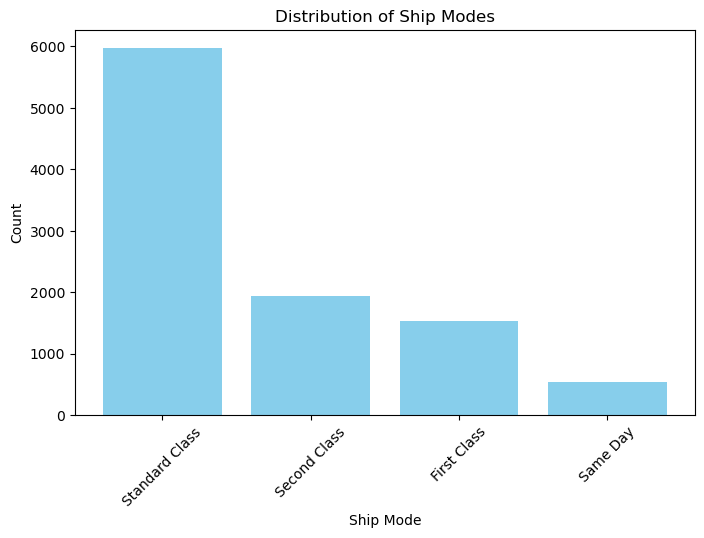

In [26]:
import matplotlib.pyplot as plt
# Count occurrences of each Ship Mode category
ship_mode_counts = df["Ship Mode"].value_counts()

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(ship_mode_counts.index, ship_mode_counts.values, color='skyblue')

# Labels and title
plt.xlabel("Ship Mode")
plt.ylabel("Count")
plt.title("Distribution of Ship Modes")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show plot
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y

array([2, 2, 2, ..., 3, 3, 2])

In [29]:
X = df_ohe_encoded.values

In [30]:
X

array([[0.0, 2, 41.9136, ..., False, True, False],
       [0.0, 3, 219.582, ..., False, True, False],
       [0.0, 2, 6.8714, ..., False, False, True],
       ...,
       [0.2, 2, 19.3932, ..., False, False, True],
       [0.0, 4, 13.32, ..., False, False, True],
       [0.0, 2, 72.948, ..., False, False, True]], dtype=object)

In the above graph, you can see that there is a lot of class imbalance. 

<br/>
Let's look at Resampling Methods to eliminate class imbalance

#### SMOTE (Synthetic Minority Over-sampling Technique)

In [31]:
!pip install imbalance-learn 

ERROR: Could not find a version that satisfies the requirement imbalance-learn (from versions: none)
ERROR: No matching distribution found for imbalance-learn


In [32]:
from collections import Counter

In [33]:
print("Class distribution after SMOTE:\n", Counter(y))

Class distribution after SMOTE:
 Counter({3: 5968, 2: 1945, 0: 1538, 1: 543})


In [34]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)

# Apply SMOTE on training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:\n", Counter(y_resampled))

Class distribution after SMOTE:
 Counter({2: 5968, 3: 5968, 0: 5968, 1: 5968})


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(7995, 606)

## 6. Principle Component Analysis


In [37]:
X_train

array([[0.8, 1, -5.2072, ..., False, False, False],
       [0.0, 7, 67.1139, ..., True, False, False],
       [0.2, 7, 3.5994, ..., False, False, True],
       ...,
       [0.2, 3, 9.5526, ..., False, False, True],
       [0.0, 2, 0.1472, ..., False, False, True],
       [0.15, 2, -12.8784, ..., False, False, True]], dtype=object)

### The Impact of Large Feature Spaces and the Role of PCA

#### 1. **Challenges of High-Dimensional Data**
- **Curse of Dimensionality**: More features require exponentially more data to avoid overfitting.
- **Increased Computational Cost**: More features lead to higher memory and computation requirements.
- **Multicollinearity**: Redundant features complicate model learning.

#### 2. **Dimensionality Reduction with PCA**
- **PCA** reduces dimensions by finding the directions of maximum variance in the data.
- **How PCA Helps**:
  - **Reduces Overfitting**: Removes noise and irrelevant features.
  - **Improves Efficiency**: Reduces training time and memory use.
  - **Enhances Generalization**: Removes correlated features, helping the model focus on important patterns.

#### 3. **PCA as an Embedding**
- PCA projects data into a lower-dimensional space while retaining critical information.
- The transformed data can be used as input for machine learning models, making them more efficient and effective.

**Example**:  
Reducing 606 features to a smaller number (e.g., 3 or 20) via PCA makes the model more compact, reducing complexity and improving performance.


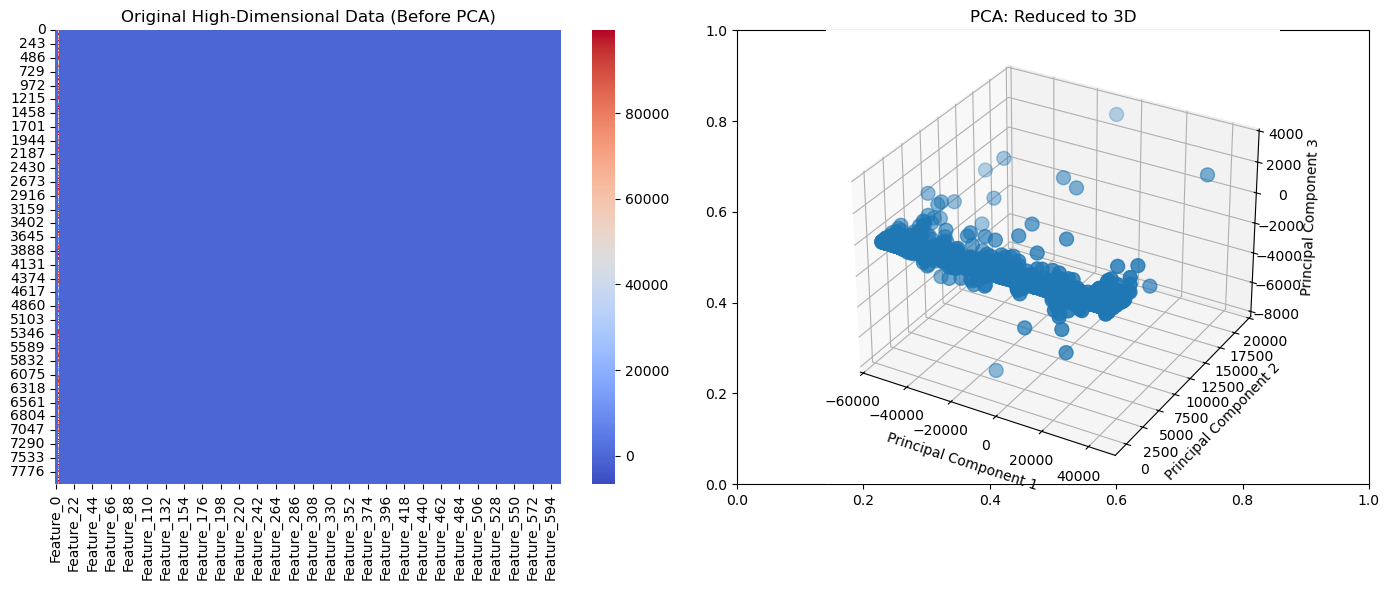

Explained Variance by each component: [9.99616795e-01 3.52378281e-04 3.08184113e-05 4.56956339e-09
 3.57554624e-10 2.69498631e-10 2.34731148e-10 1.98866678e-10
 1.51757455e-10 1.45195903e-10 1.38679940e-10 1.18666263e-10
 1.11673090e-10 1.04146866e-10 8.27310630e-11 7.81895307e-11
 7.23419641e-11 6.93058622e-11 6.02898974e-11 5.18015416e-11]


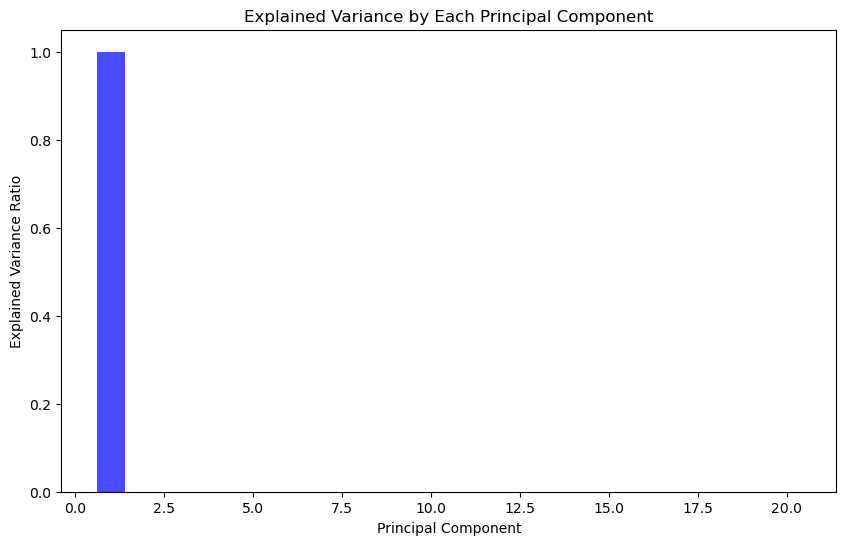

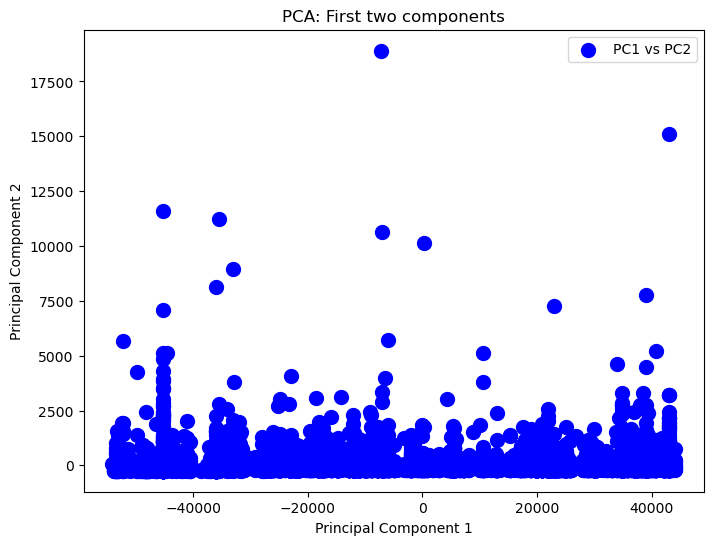

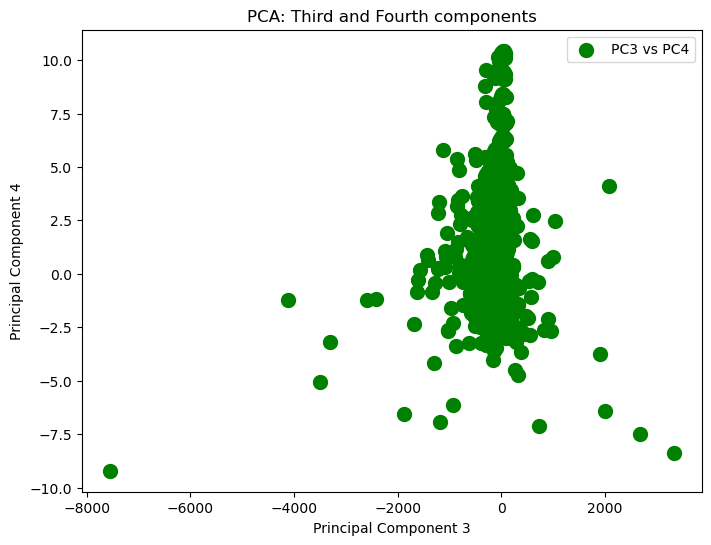

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


# Convert to DataFrame for visualization and ensure it's numeric
df = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(606)])

df = df.astype(float)
# Step 2: Apply PCA to reduce dimensions to 20
pca = PCA(n_components=20)  # Reduce to 20 components
X_pca = pca.fit_transform(X_train)

# Step 3: Create a figure with two subplots (before and after PCA)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# **Before PCA: Heatmap of the first few features**
sns.heatmap(df, cmap="coolwarm", ax=axes[0])  # Show first 50 features
axes[0].set_title("Original High-Dimensional Data (Before PCA)")

# **After PCA: 3D scatter plot of the reduced data**
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=100)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA: Reduced to 3D")

plt.tight_layout()
plt.show()

# Step 4: Check explained variance (Optional)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each component:", explained_variance)

# Step 5: Plot explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), explained_variance, alpha=0.7, color='blue')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Each Principal Component")
plt.show()

# Step 6: 2D or 3D scatter for more combinations of principal components
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting first two principal components
ax.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='PC1 vs PC2', s=100)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("PCA: First two components")
plt.legend()
plt.show()

# Optionally, plotting more pairs (e.g., PC3 vs PC4)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_pca[:, 2], X_pca[:, 3], c='green', label='PC3 vs PC4', s=100)
ax.set_xlabel("Principal Component 3")
ax.set_ylabel("Principal Component 4")
ax.set_title("PCA: Third and Fourth components")
plt.legend()
plt.show()


In [42]:
X_pca

array([[ 2.18999429e+04, -2.15621948e+02,  2.92301179e+01, ...,
        -1.93527183e-03,  1.09397181e-01,  7.20652457e-01],
       [-4.51711573e+04,  1.33273530e+01,  2.31883088e+01, ...,
         4.73368295e-02, -2.21557468e-02, -2.45823686e-01],
       [ 3.01279235e+04, -1.65819824e+02,  2.62080330e+01, ...,
         2.27923166e-02, -1.13729669e-01,  1.18788414e-01],
       ...,
       [ 4.29099288e+04, -1.79722620e+02,  3.94307584e+01, ...,
        -4.02013193e-02,  1.96637411e-01,  1.59266530e-02],
       [ 3.89269383e+04, -2.02210941e+02,  3.50857269e+01, ...,
        -4.68097191e-02, -7.38005443e-01,  2.71254462e-01],
       [ 3.99278442e+04,  5.08042637e+01, -5.01216352e+01, ...,
         1.43569434e-01, -1.63905039e-01,  2.48299491e-02]])

In [43]:
X_pca.shape

(7995, 20)